In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from IPython.display import clear_output
import numpy as np

In [2]:
def bostonBikeData():
    # PURPOSE: Creates a single dataframe holding only the Boston bike data of interest 
    # ARGUMENTS: None
    # RETURNS: Dataframe holding bike data
    
    #Location of raw data
    fileDir = '../data/BikeData/' + 'Boston' +'/'

    #Lists to hold output data
    cityList = []
    tripDuration = []
    startTime = []
    endTime = []
    tripList = []
    yearList = []
    monthList = []
    weekList =[]
    dayList = []
    weekdayList = []
    startStationList = []
    endStationList = []
    bikeIdList = []
    stations = set()
    bikes = set()
    numStations = []
    numBikes = []
    
    #Read in all csvs and save start/end times
    for each_csv in os.listdir(fileDir):
        print(each_csv)
        raw_df = pd.read_csv(fileDir + each_csv)
        raw_df = raw_df.fillna('0')
        startTime.extend(raw_df['starttime'].tolist())
        endTime.extend(raw_df['stoptime'].tolist())
        startStationList.extend(raw_df['start station id'].tolist())
        endStationList.extend(raw_df['end station id'].tolist())
        bikeIdList.extend(raw_df['bikeid'].tolist())
    
    #Parse start/end dates
    for i in range(len(startTime)):
        try:
            startFormatted = datetime.strptime(startTime[i], "%Y-%m-%d %H:%M:%S")
            endFormatted = datetime.strptime(endTime[i], "%Y-%m-%d %H:%M:%S")
        except Exception:
            try:
                startFormatted = datetime.strptime(startTime[i], "%Y-%m-%d %H:%M:%S.%f")
                endFormatted = datetime.strptime(endTime[i], "%Y-%m-%d %H:%M:%S.%f")
            except:
                print(f'Time formatting Error at {startTime[i]}')
    
        #Populate parsed data
        yearList.append(startFormatted.year)
        monthList.append(startFormatted.month)
        weekList.append(startFormatted.isocalendar()[1])
        dayList.append(startFormatted.day)
        stations.add(startStationList[i])
        stations.add(endStationList[i])
        bikes.add(bikeIdList[i])
        numStations.append(len(stations))
        numBikes.append(len(bikes))
        
        #Get weekend or weekday
        if startFormatted.weekday() > 4:
            weekdayList.append('N')
        else:
            weekdayList.append('Y')

        #Trip duration
        time_delta = (endFormatted - startFormatted)
        total_seconds = time_delta.total_seconds()
        tripDuration.append(total_seconds)
        
        #Remaining data
        cityList.append('Boston')
        tripList.append(1)
        
    #Write data 
    data = {'City':cityList,
            'TripStart':startTime,
            'TripEnd':endTime,
            'Year':yearList,
            'Month':monthList,
            'Week':weekList,
            'Day':dayList,
            'Duration(sec)':tripDuration,
            'Weekday':weekdayList,
            'NumTrips':tripList,
            'NumStations':numStations,
            'NumBikes':numBikes,
            'StartStation':startStationList,
            'EndStation':endStationList}
    
    df_data = pd.DataFrame(data)
    df_data = df_data.loc[~(df_data['StartStation']==df_data['EndStation'])]
    df_data = df_data.drop(columns=['StartStation','EndStation'])
    df_data = df_data.loc[df_data['Duration(sec)']>0]
    df_data = df_data.loc[df_data['Duration(sec)']<10800]
     
    #df_data.columns=['City','Year','Week','Average Duration (sec)','Number Trips']
    
    clear_output(wait=False)
    return df_data
        

In [3]:
def portlandBikeData():
    # PURPOSE: Creates a single dataframe holding only the Portland bike data of interest 
    # ARGUMENTS: None
    # RETURNS: Dataframe holding bike data
    
    #Location of raw data
    fileDir = '../data/BikeData/' + 'Portland' +'/'

    #Lists to hold output data
    cityList = []
    tripDuration = []
    startTime = []
    startDate = []
    endTime = []
    endDate = []
    tripList = []
    yearList = []
    monthList = []
    weekList =[]
    dayList = []
    weekdayList = []
    startStationList = []
    endStationList = []
    bikeIdList = []
    stations = set()
    bikes = set()
    numStations = []
    numBikes = []
    startHub = []
    endHub = []
    
    #Read in all csvs and save start/end times
    for each_csv in os.listdir(fileDir):
        print(each_csv)
        raw_df = pd.read_csv(fileDir + each_csv)
        raw_df = raw_df.fillna('0')
        startDate.extend(raw_df['StartDate'].tolist())
        startTime.extend(raw_df['StartTime'].tolist())
        endDate.extend(raw_df['EndDate'].tolist())
        endTime.extend(raw_df['EndTime'].tolist())
        startStationList.extend(raw_df['StartHub'].tolist())
        endStationList.extend(raw_df['EndHub'].tolist())
        bikeIdList.extend(raw_df['BikeID'].tolist())
    
    #Combine date and time values into one 
    startTimeFull = []
    endTimeFull = []
    for i in range(len(startDate)):
        startTimeFull.append(startDate[i] + ' ' + startTime[i])
        endTimeFull.append(endDate[i] + ' ' + endTime[i])

    #To account for skipped data
    startTimeFullAdjusted = []
    endTimeFullAdjusted = []
        
    #Parse start/end dates
    for i in range(len(startTimeFull)):
        if ((startTimeFull[i] == '0 0') or (endTimeFull[i] == '0 0')):
            continue
        else:
            try:
                startFormatted = datetime.strptime(startTimeFull[i], "%m/%d/%Y %H:%M")
                endFormatted = datetime.strptime(endTimeFull[i], "%m/%d/%Y %H:%M")
            except Exception:
                print(f'Time formatting Error at {startTimeFull[i]}')
        
            #Populate parsed data
            yearList.append(startFormatted.year)
            monthList.append(startFormatted.month)
            weekList.append(startFormatted.isocalendar()[1])
            dayList.append(startFormatted.day)
            stations.add(startStationList[i])
            stations.add(endStationList[i])
            bikes.add(bikeIdList[i])
            numStations.append(len(stations))
            numBikes.append(len(bikes))
            
            #Get weekend or weekday
            if startFormatted.weekday() > 4:
                weekdayList.append('N')
            else:
                weekdayList.append('Y')
    
            #Trip duration
            time_delta = (endFormatted - startFormatted)
            total_seconds = time_delta.total_seconds()
            tripDuration.append(total_seconds)
            
            #Remaining data
            cityList.append('Portland')
            tripList.append(1)
            
            #To account for skipped data
            startTimeFullAdjusted.append(startTimeFull[i])
            endTimeFullAdjusted.append(endTimeFull[i])
            startHub.append(startStationList[i])
            endHub.append(endStationList[i])
    
    #Write data 
    data = {'City':cityList,
            'TripStart':startTimeFullAdjusted,
            'TripEnd':endTimeFullAdjusted,
            'Year':yearList,
            'Month':monthList,
            'Week':weekList,
            'Day':dayList,
            'Duration(sec)':tripDuration,
            'Weekday':weekdayList,
            'NumTrips':tripList,
            'NumStations':numStations,
            'NumBikes':numBikes,
            'StartStation':startHub,
            'EndStation':endHub}
    
    df_data = pd.DataFrame(data)
    df_data = df_data.loc[~(df_data['StartStation']==df_data['EndStation'])]
    df_data = df_data.drop(columns=['StartStation','EndStation'])
    df_data = df_data.loc[df_data['Duration(sec)']>0]
    df_data = df_data.loc[df_data['Duration(sec)']<10800]
     
    #df_data.columns=['City','Year','Week','Average Duration (sec)','Number Trips']
    
    clear_output(wait=False)
    return df_data
    

In [4]:
dfBoston = bostonBikeData()
dfPortland = portlandBikeData()

In [5]:
boston = dfBoston.copy()
portland = dfPortland.copy()

In [6]:
def plotCityData(df):
    
    #set up x axis to plot 
    year = df['Year'].iloc[0]
    week = df['Week'].iloc[0]
    startDate = datetime.fromisocalendar(year,week,1)
    year = df['Year'].iloc[-1]
    week = df['Week'].iloc[-1]
    endDate = datetime.fromisocalendar(year,week,1)
    timeSplit = len(df)
    indexValues = pd.date_range(start=startDate, end=endDate, periods=timeSplit)
    df = df.set_index(indexValues)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    line1 = ax1.plot(df.index,df['Duration(sec)'] , 'g-', label = 'Duration')
    line2 = ax2.plot(df.index, df['NumTrips'], 'b-', label = 'Trips')
    ax1.set_ylabel('Time (sec)', fontsize = 24, labelpad=10)
    ax2.set_ylabel('Number Trips', fontsize = 24, labelpad=10)
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
    fig.set_size_inches(18, 9)
    title = df['City'].iloc[0] + ' Bike Data'
    fig.suptitle(title, fontsize=32)
    
    lns = line1+line2
    labs = [l.get_label() for l in lns]
    leg = ax1.legend(lns, labs, loc=0, fontsize = 24)
    
    fig.show()
    

In [7]:
boston = boston.drop(columns=['TripStart','TripEnd','Month','Day','Weekday','NumBikes','NumStations'],axis=1)
boston = boston.groupby(['City','Year','Week']).agg({'Duration(sec)':['mean'],'NumTrips':['sum']})
boston = boston.reset_index()

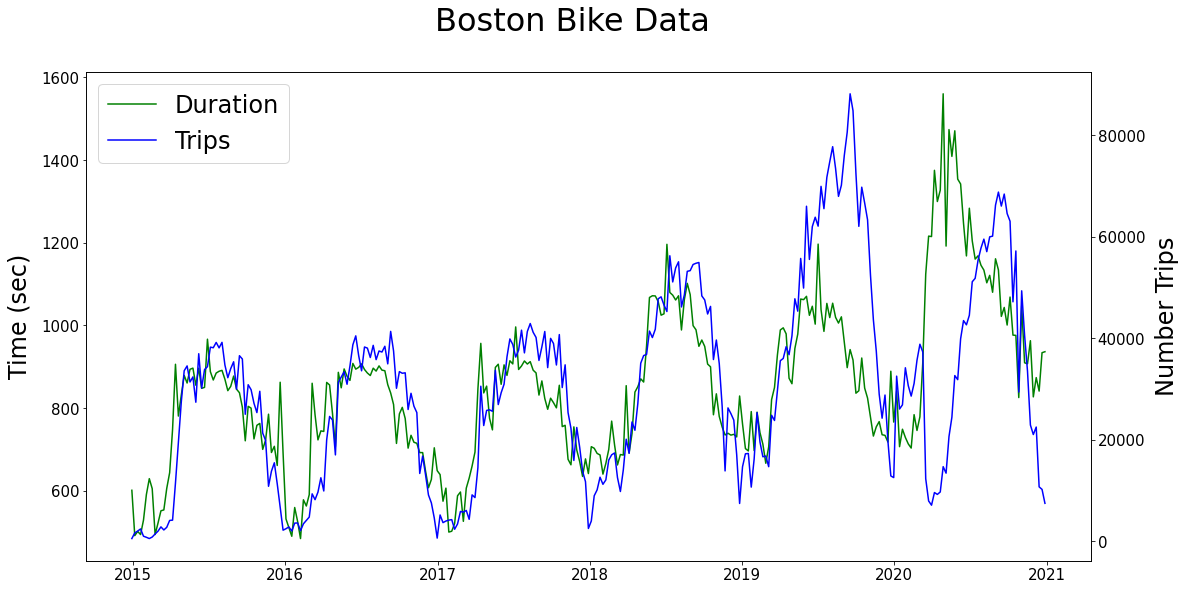

In [8]:
plotCityData(boston)

In [9]:
portland = portland.drop(columns=['TripStart','TripEnd','Month','Day','Weekday','NumBikes','NumStations'],axis=1)
portland = portland.groupby(['City','Year','Week']).agg({'Duration(sec)':['mean'],'NumTrips':['sum']})
portland = portland.reset_index()

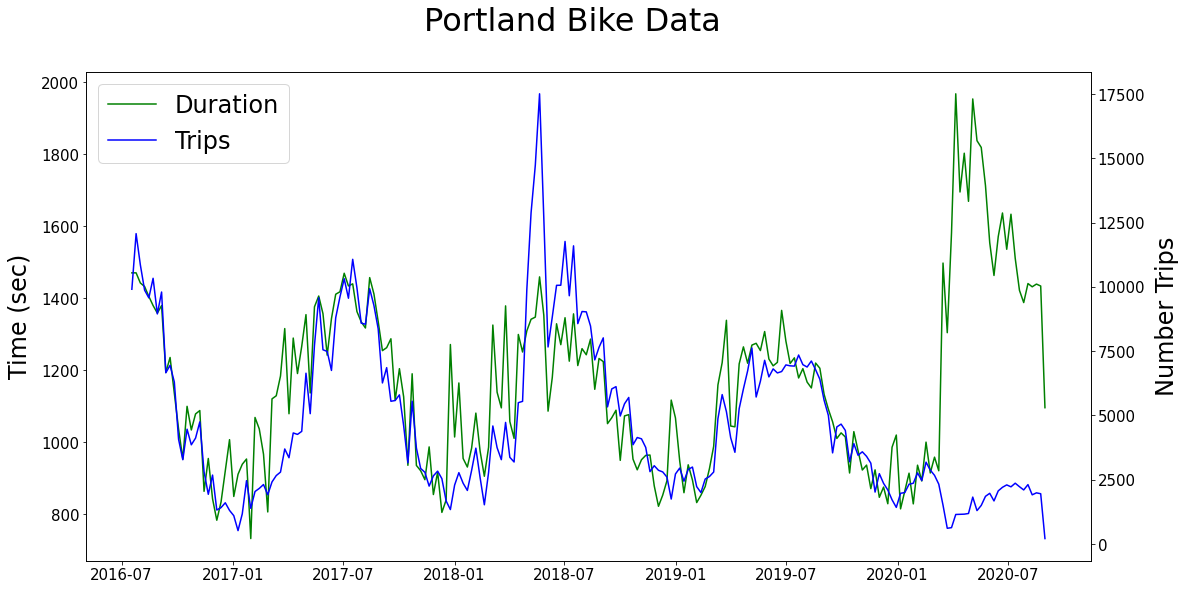

In [10]:
plotCityData(portland)